### 데이터 셋과 의사결정트리 기반 분류기 관련 클래스 불러오기

In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

### 테스트를 위해 사용하는 데이터 셋의 분리 방법 관련 모듈을 임포트

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

### 성능평가 관련 모듈 불러오기

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

### 데이터 셋 구성

In [4]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

###  Train, Test set 구성

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Decision tree 분류 모델 생성

In [6]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
y_pred = clf.predict(X_test)

### 모델 성능 평가

In [8]:
print('ConfusionMatrix')
print(confusion_matrix(y_test, y_pred))

ConfusionMatrix
[[32  4]
 [ 5 73]]


### Y_test와 y_pred 값을 비교해 정확도(accuracy)를 출력


In [9]:
print('Accuracy')
print(accuracy_score(y_test, y_pred, normalize=True))

Accuracy
0.921052631579


### Classification_report 함수를 사용해 각 클래스에 대한 precision, recall 출력


In [10]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
             precision    recall  f1-score   support

          0       0.86      0.89      0.88        36
          1       0.95      0.94      0.94        78

avg / total       0.92      0.92      0.92       114



### Roc_auc_score 함수를 사용해 roc 곡선 아래 면적 출력


In [12]:
print('AUC')
print(roc_auc_score(y_test, y_pred))

AUC
0.912393162393


### Mean_squared_error 함수를 사용해 MSE 출력


In [13]:
print('Mean Squared Error')
print(mean_squared_error(y_test, y_pred))

Mean Squared Error
0.0789473684211


### K fold cross validation

### 데이터 셋 구성

#### StratifiedKFold 모듈을 사용해 10 cross validation 모듈을 skf로 생성

In [16]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)
print(skf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


#### 10번의 실험을 위한 데이터 셋 구성을 살펴봄


In [17]:
for train_index, test_index in skf.split(X, y):
    print('Train set : ', train_index)
    print('Test set : ', test_index)

Train set :  [ 25  26  27  28  29  30  31  32  33  34  35  36  38  39  40  41  42  43
  44  45  47  53  54  56  57  62  64  65  70  72  73  75  77  78  82  83
  85  86  87  91  94  95  99 100 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291
 292 293 294 295 296 297 298 299 300 3

### 기계학습 모델 성능평가

- DecisionTreeClassifier 모델을 clf에 생성
- Cross_val_score 함수를 사용해 X, y 데이터에 대해 10 fold cross validation 진행한 accuracy 출력
- 10개 accuracy의 평균 출력

In [18]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=skf)
print('K fold Cross Validation Score')
print(scores)
print("Average Accuracy")
print(scores.mean())

K fold Cross Validation Score
[ 0.94827586  0.86206897  0.9122807   0.89473684  0.9122807   0.89473684
  0.89473684  0.94642857  0.92857143  0.94642857]
Average Accuracy
0.914054532884


### K fold cross validation - shuffle

### 데이터 셋 구성

- StratifiedKFold 모듈을 사용해 10 cross validation 모듈을 skf로 생성
- Shuffle을 True로 설정하여 데이터를 섞은 후 데이터 셋 구성하도록 함

In [19]:
skf_sh = StratifiedKFold(n_splits=10, shuffle=True)
skf_sh.get_n_splits(X, y)
print(skf_sh)

StratifiedKFold(n_splits=10, random_state=None, shuffle=True)


In [20]:
for train_index, test_index in skf_sh.split(X, y) :
    print('Train set: ', train_index)
    print('Test set: ', test_index)

Train set:  [  0   1   2   3   4   5   7   8   9  10  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  41  42  44  45  47  48  49  50  51  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  97  98  99 100 101 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 119 120 121 122 123 124 125 126 127 128 129 130 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 147 148 149 150 151 152 154 155
 156 157 158 159 160 161 162 163 164 165 166 168 169 170 171 172 173 174
 175 176 177 178 180 181 182 183 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 200 201 202 203 204 205 206 208 209 210 211 212 213 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 249 250 252 253 255
 256 257 258 259 260 261 262 264 265 26

In [21]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=skf)
print('K fold Cross Validation Score')
print(scores)
print("Average Accuracy")
print(scores.mean())

K fold Cross Validation Score
[ 0.94827586  0.87931034  0.9122807   0.89473684  0.98245614  0.89473684
  0.89473684  0.94642857  0.91071429  0.94642857]
Average Accuracy
0.921010500389


# # 단일 선형 회귀 분석 Basic 1

#### 단일 선형 회귀 모델의 가정

- 하나의 종속 변수와 하나의 독립변수를 분석
- 독립변수 X의 각 값에 대한 Y의 확률분포가 존재함
- Y의 확률분포의 평균은 X값이 변함에 따라 일정한 추세를 따라 움직인다.
- 종속변수와 독립변수 간에는 선형 함수 관계가 존재함

#### Python package 가져오기 및 matplotlib 출력 옵션 설정

In [23]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

#### 데이터 만들기

In [24]:
data = {'x' : [13, 19, 16, 14, 15, 14],
        'y' : [40, 83, 62, 48, 58, 43]}

data = pd.DataFrame(data)
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


#### 산점도로 나타내어 보기

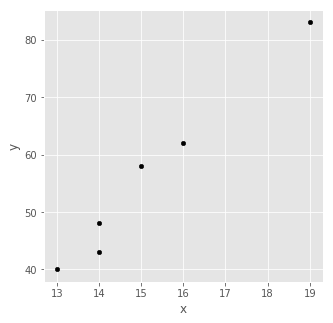

In [25]:
data.plot(kind="scatter", x='x', y='y', figsize = (5,5), color = "black")

#### 데이터 학습시키기

In [27]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(data["x"]), y=data["y"])
prediction = linear_regression.predict(X = pd.DataFrame(data["x"]))

print("a value =", linear_regression.intercept_)
print("b value =", linear_regression.coef_)

a value = -55.4817518248
b value = [ 7.32846715]


#### 적합도 검증

In [28]:
residuals = data["y"] - prediction
residuals.describe()

count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

In [30]:
SSE = (residuals**2).sum()
SST = ((data["y"]-data["y"].mean())**2).sum()
R_squared = 1-(SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.975315617961


#### 예측하여 플롯으로 나타내기

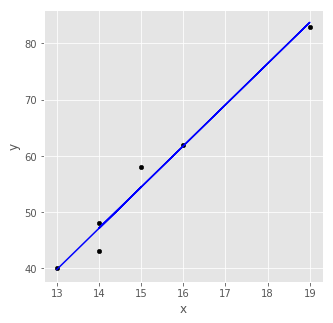

In [34]:
data.plot(kind="scatter", x="x", y="y", figsize=(5,5), color="black")

plt.plot(data["x"], prediction, color = "blue")

#### 성능 평가하기

In [49]:
from sklearn.metrics import mean_squared_error
print("score = ", linear_regression.score(X = pd.DataFrame(data["x"]), y=data["y"]))
print("Mean_Squared_Error = ", mean_squared_error(prediction, data["y"]))
print("RSME = ", mean_squared_error(prediction, data["y"])**0.5)

score =  0.975315617961
Mean_Squared_Error =  5.17274939173
RSME =  2.27436791037


# # 단일 선형 회귀 분석 Basic 2

#### Python package 가져오기 
#### Boston dataset 로드하기

In [51]:
from sklearn import datasets
boston_house_prices = datasets.load_boston()

print(boston_house_prices.keys())
print(boston_house_prices.data.shape)
print(boston_house_prices.feature_names)

dict_keys(['DESCR', 'data', 'target', 'feature_names'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


#### Boston dataset 정보 보기

In [53]:
print(boston_house_prices.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

#### Boston dataset 데이터프레임으로 정제하기

In [54]:
data_frame = pd.DataFrame(boston_house_prices.data)
data_frame.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [55]:
data_frame.columns = boston_house_prices.feature_names
data_frame.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [56]:
data_frame['price'] = boston_house_prices.target
data_frame.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


#### 산점도로 나타내어 보기

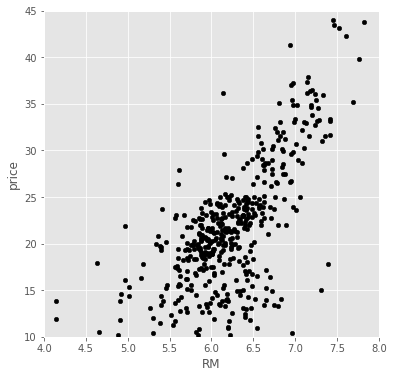

In [57]:
data_frame.plot(kind="scatter", x="RM", y="price", figsize =(6,6), color="black", xlim=(4,8), ylim=(10,45))

#### 데이터 학습시키기

In [60]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(data_frame["RM"]), y = data_frame["price"])
prediction = linear_regression.predict(X = pd.DataFrame(data_frame["RM"]))

print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  -34.6706207764
b value =  [ 9.10210898]


#### 적합도 검증

In [62]:
residuals = data_frame["price"] - prediction
residuals.describe()

count    5.060000e+02
mean     1.899227e-15
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: price, dtype: float64

In [66]:
SSE = (residuals**2).sum()
SST = ((data_frame["price"]-data_frame["price"].mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.483525455991


#### 예측하여 플롯으로 나타내기

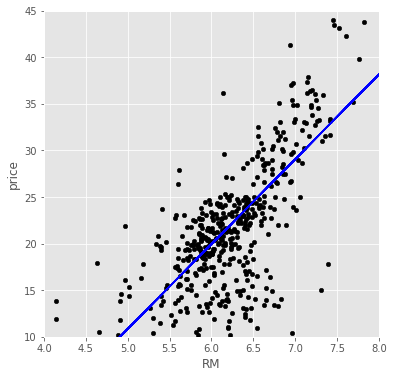

In [69]:
data_frame.plot(kind="scatter", x="RM", y="price", figsize=(6,6), color ="black", xlim =(4,8), ylim=(10, 45))

plt.plot(data_frame['RM'], prediction, color="blue")

#### 성능 평가하기

In [76]:
print('score =', linear_regression.score(X = pd.DataFrame(data_frame["RM"]), y = data_frame["price"]))
print('Mean_Squared_Error =', mean_squared_error(prediction, data_frame["price"]))
print('RMSE =', mean_squared_error(prediction, data_frame["price"])**0.5)

score = 0.483525455991
Mean_Squared_Error = 43.6005517712
RMSE = 6.60307138922


# # Test

In [78]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

In [84]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

In [85]:
cancer.data

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [86]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [92]:
print(boston_house_prices.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [100]:
boston = pd.DataFrame(boston_house_prices.data)
boston.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [102]:
boston.columns = boston_house_prices.feature_names

In [103]:
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [105]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [106]:
boston['Price'] = boston_house_prices.target
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [108]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [111]:
boston['Price'].head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64